In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("advertising.csv")

In [40]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [41]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [42]:
df.shape

(200, 4)

In [43]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
matrix_correlation=df.corr()

In [46]:
matrix_correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


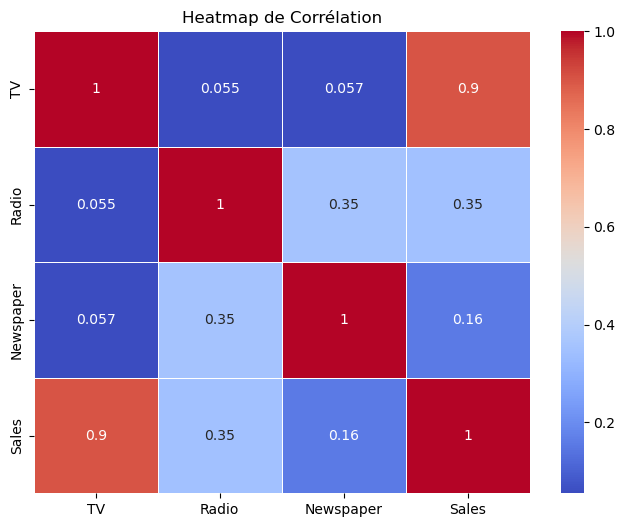

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Corrélation')
plt.show()

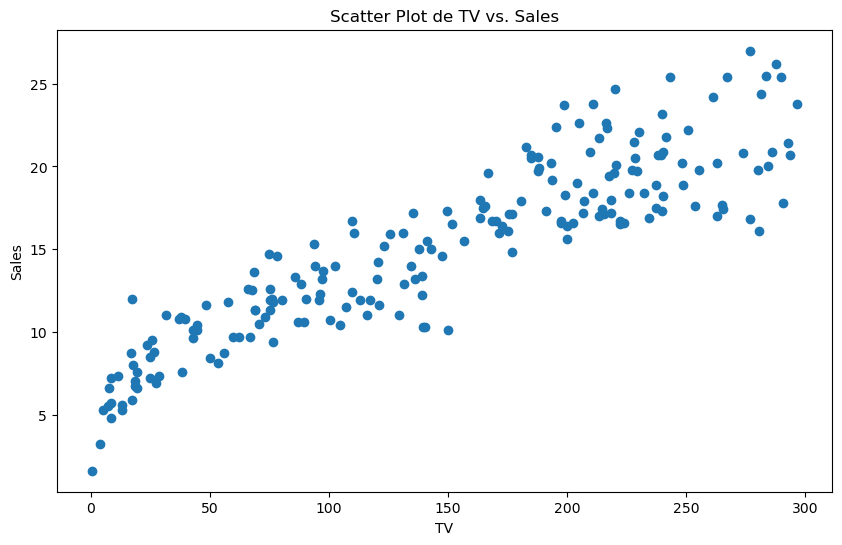

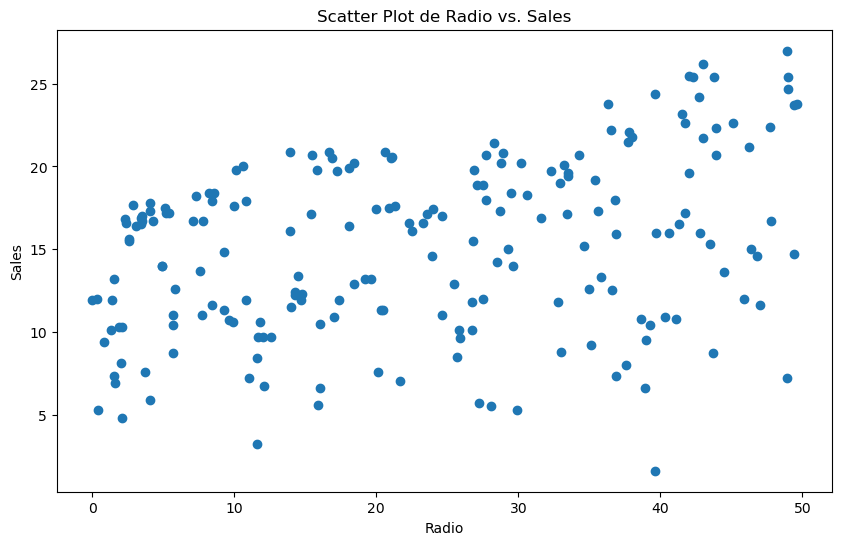

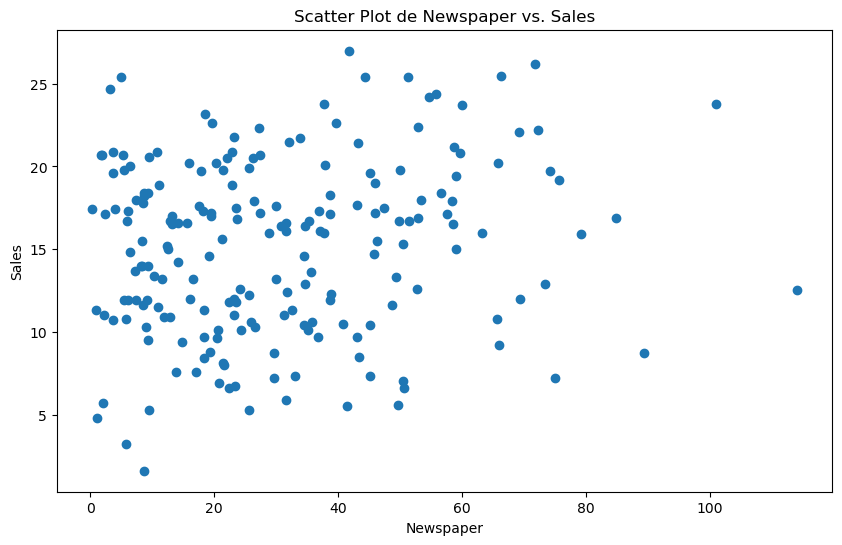

In [48]:
# Liste des noms des colonnes à parcourir
columns_to_plot = ['TV', 'Radio', 'Newspaper']

# Boucle for pour créer des scatter plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df['Sales'])
    plt.xlabel(column)
    plt.ylabel('Sales')
    plt.title(f'Scatter Plot de {column} vs. Sales')
    plt.show()

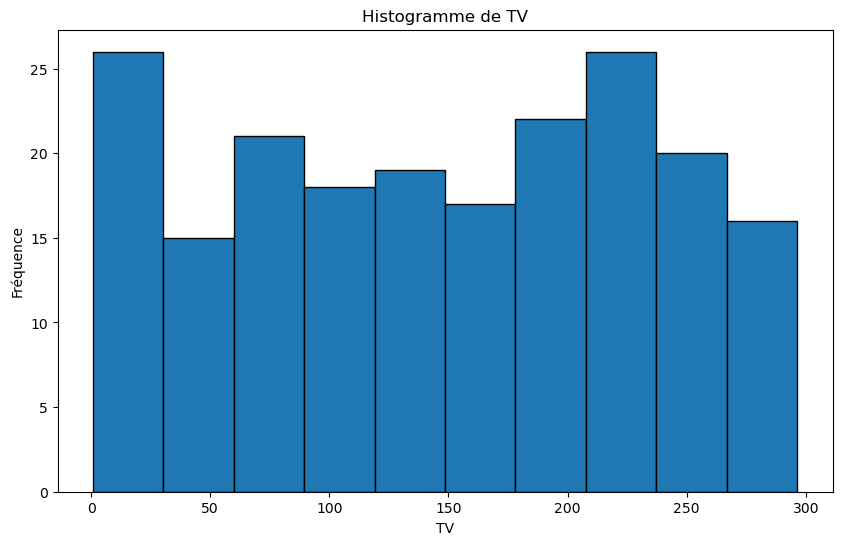

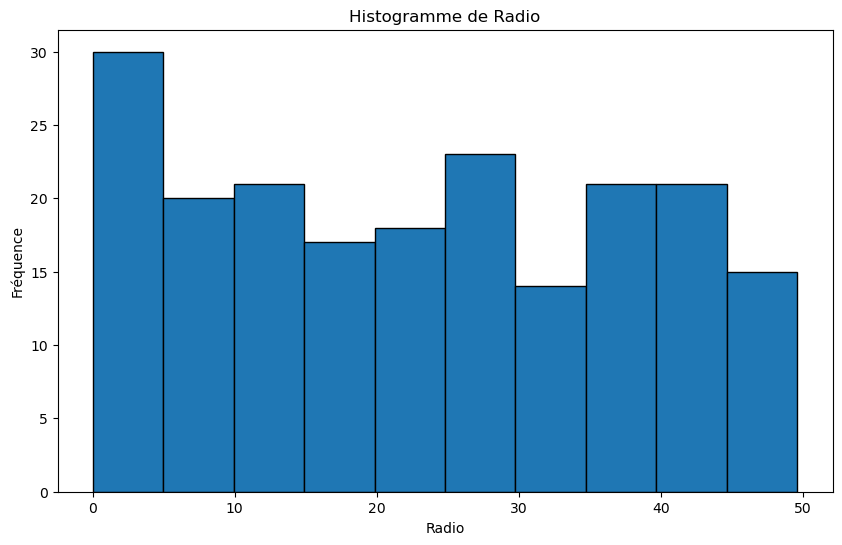

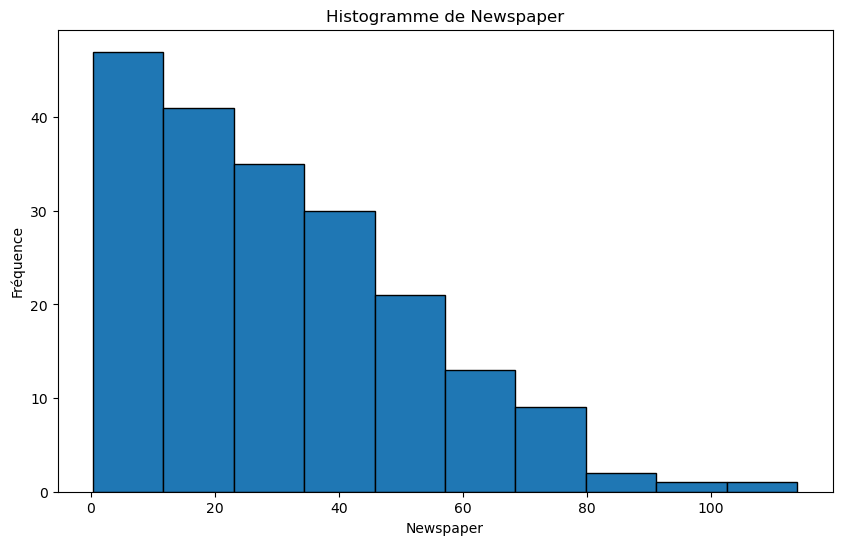

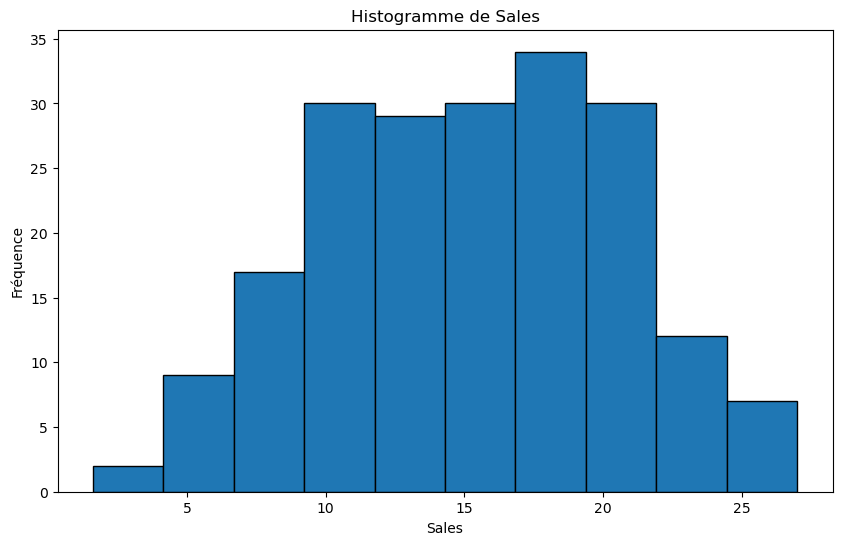

In [49]:
# Liste des noms des colonnes à parcourir
columns_to_plot = ['TV', 'Radio', 'Newspaper', 'Sales']

# Boucle for pour créer des histogrammes
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=10, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.title(f'Histogramme de {column}')
    plt.show()

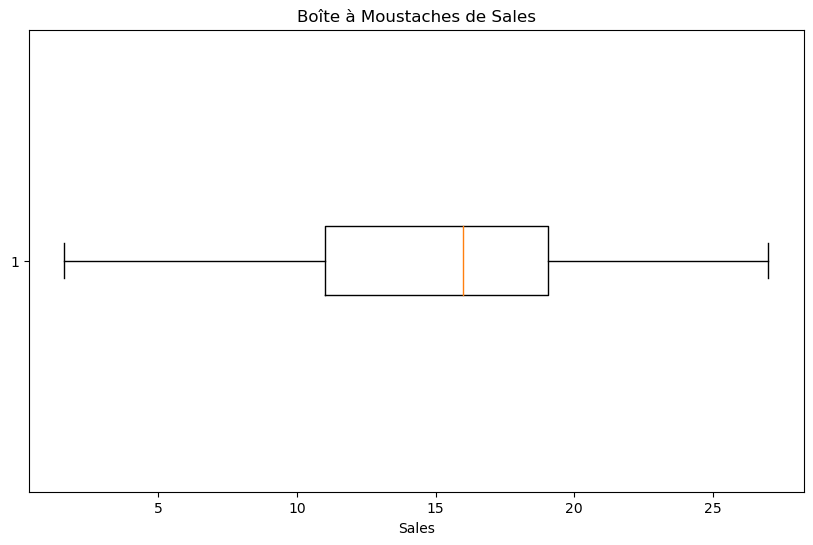

In [50]:
# Créer une boîte à moustaches (boxplot) pour Sales
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'], vert=False)
plt.xlabel('Sales')
plt.title('Boîte à Moustaches de Sales')
plt.show()

In [51]:
x=df.drop("Sales",axis=1)

In [52]:
y=df["Sales"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [54]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [69]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[15.76009495 10.35633677 13.74268711 20.89407055 24.90888356 15.96404812
 22.01500291 10.78643994 12.46462002  9.89340771 19.3900734  20.19558086
 14.73822063 15.54479137 15.73518229 10.44479522 15.8336908  18.87221072
  7.99360692 13.99342411 12.12822036 21.07865408 17.13492417 22.21538326
 17.10206692 10.25121926 10.5924398  17.117858    7.98754856  8.90340499
 21.2260486  10.58020572 18.89730805 21.24042066 18.88400523  9.63019994
 18.13231302 21.85850312 13.7643628  23.12426769]
96     16.7
5       7.2
116    12.2
35     17.8
183    26.2
160    16.4
54     20.2
134    10.8
90     14.0
191    11.9
139    20.7
142    20.1
177    16.7
26     15.0
89     16.7
140    10.9
171    17.5
23     20.5
132     5.7
37     14.7
151    11.6
28     18.9
85     20.2
93     22.2
174    16.5
75      8.7
18     11.3
105    15.0
121     7.0
130     1.6
33     17.4
46     10.6
168    17.1
169    20.0
11     17.4
166     8.0
81     17.3
111    21.8
67     13.4
147    25.4
Name: Sales, dtype: float64


In [70]:
# Calculer les métriques d'évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_test_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
msle = mean_squared_log_error(y_test_log, y_pred_log)

# Afficher les métriques
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'MSLE: {msle}')











RMSE: 1.9955880115023594
MAE: 1.501066611907401
R²: 0.8600500994057845
MSLE: 0.007841344267166681


In [75]:
from sklearn.ensemble import RandomForestRegressor

# Créer un modèle de régression de forêt aléatoire
model = RandomForestRegressor(n_estimators=100)  # Vous pouvez ajuster le nombre d'arbres

# Entraîner le modèle
model.fit(x_test, y_test)

# Faire des prédictions
y_pred = model.predict(x_test)
# Calculer les métriques d'évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_test_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)
msle = mean_squared_log_error(y_test_log, y_pred_log)

# Afficher les métriques
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'MSLE: {msle}')

RMSE: 0.7515278936939033
MAE: 0.5815749999999993
R²: 0.9801518044169985
MSLE: 0.0016754623228822092
